A company's stock share is a piece of the company more precisely:

<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 

<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [3]:
!pip install yfinance
#!pip install pandas

In [4]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `TSLV`.


In [16]:
apple = yf.Ticker("TSLA")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [21]:
apple_info=apple.info
apple_info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

We can get the <code>'country'</code> using the key country


In [24]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [28]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [30]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [32]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

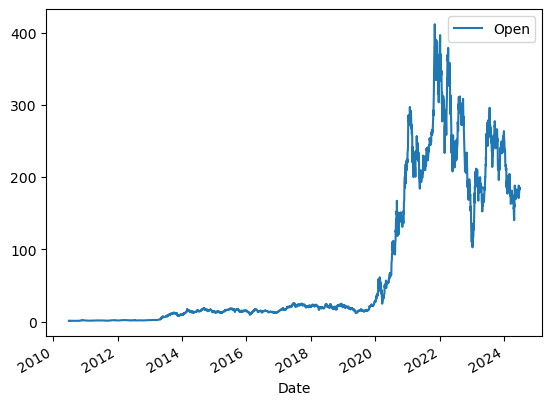

In [37]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [40]:
apple.dividends

Series([], Name: Dividends, dtype: float64)

We can plot the dividends overtime:


<Axes: xlabel='Date'>

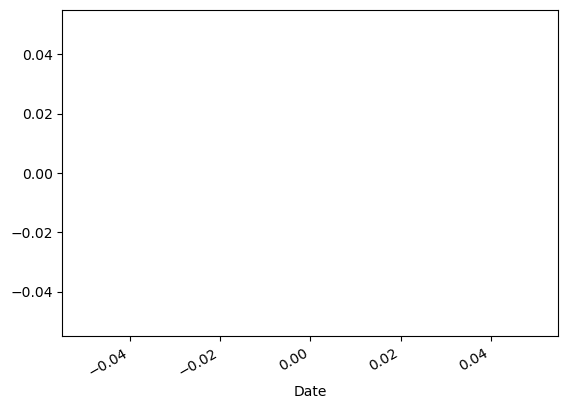

In [43]:
apple.dividends.plot()

## Exercise


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [48]:
amd = yf.Ticker("AMD")

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [51]:
amd_info=amd.info
amd_info["country"]

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [53]:
amd_info["sector"]

'Technology'

<b>Question 3</b> Find the max of the <code>Volume</code> column of AMD using the `history` function, set the <code>period</code> to max.


In [57]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.max()

Open            2.134100e+02
High            2.273000e+02
Low             2.082200e+02
Close           2.113800e+02
Volume          3.250584e+08
Dividends       0.000000e+00
Stock Splits    2.000000e+00
dtype: float64

**Author Details:**
- **Name:** Sam Joel
- **Role:** Market Researcher
